In [1]:
import numpy as np
import matplotlib.pyplot as plt

import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.NoisyClairvoyant import NoisyClairvoyant
%matplotlib inline

In [2]:
cust_json = "customer3.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph2_sparse.json"
arms = settings.prices

environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)

clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm = environment.estimate_clairvoyant()

print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

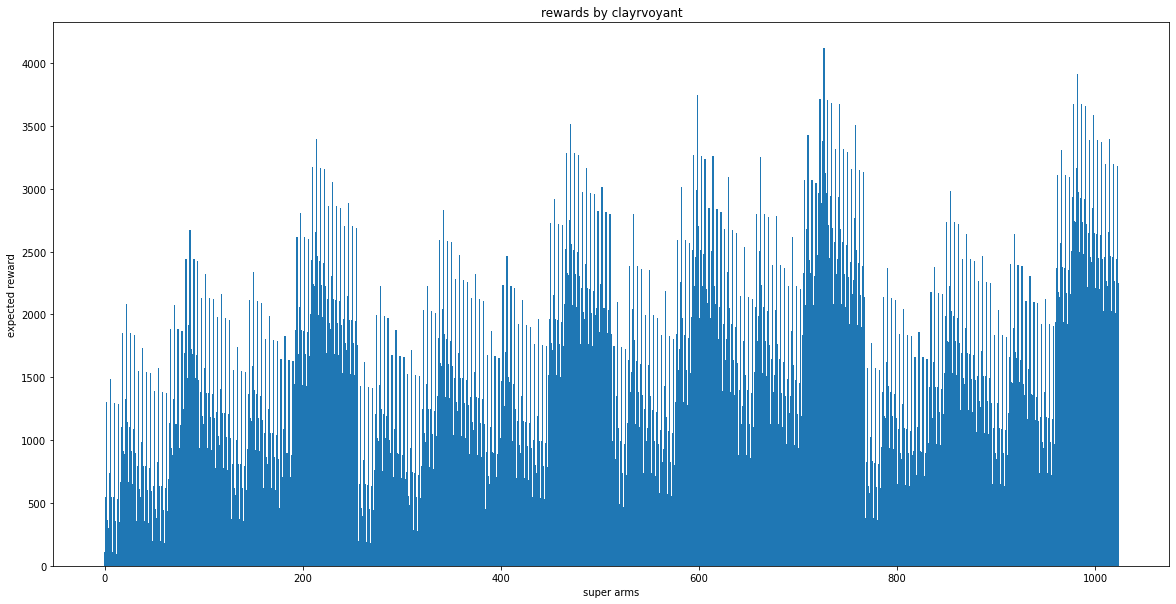

In [3]:
arms2 = list(rew_per_arm.keys())
indexes = []
for i, a in enumerate(arms2):
    indexes.append(i)
rewards = list(rew_per_arm.values())

plt.figure(figsize=(20,10))
plt.bar(indexes, rewards, width=1.2)
plt.xlabel("super arms")
plt.ylabel("expected reward")
plt.title("rewards by clayrvoyant")
plt.show()

In [4]:
n_arms = 4
n_products = 5

TIME_HORIZON = 300
NUM_ITERATION = 5

In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    gr_learner = GreedyLearner(n_arms, n_products, environment.customers, graph_json, arms, environment.customers_distribution)

    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
            
        super_arm = gr_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        gr_learner.update(super_arm.copy(), report)
        prices = [arms[p][a] for p, a in enumerate(super_arm)]
        
        
    rewards = gr_learner.get_rewards()
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

loading: [                              ] 0.0%
[0 0 0 0 0]
[0 1 0 0 0]
[0 0 0 0 1]
[1 0 0 0 0]
[0 0 1 0 0]
[0 0 0 1 0]
[0 1 1 0 0]
[0 0 2 0 0]
[1 0 1 0 0]
[0 0 1 0 1]
loading: [=                             ] 3.3%
[0 0 1 1 0]
[1 0 1 0 1]
[0 0 1 0 2]
[0 0 2 0 1]
[0 0 1 1 1]
[0 1 1 0 1]
[0 0 2 1 1]
[1 0 1 1 1]
[0 1 1 1 1]
[0 0 1 1 2]
loading: [==                            ] 6.7%
[0 0 1 2 1]
[0 1 1 1 2]
[0 0 1 1 3]
[0 0 1 2 2]
[1 0 1 1 2]
[0 0 2 1 2]
[1 0 1 2 2]
[1 0 2 1 2]
[2 0 1 1 2]
[1 0 1 1 3]
loading: [===                           ] 10.0%
[1 1 1 1 2]
[2 0 1 1 3]
[1 0 1 2 3]
[1 0 2 1 3]
[1 1 1 1 3]
[1 1 2 1 3]
[2 1 1 1 3]
[1 1 1 2 3]
[1 2 1 1 3]
[1 2 1 2 3]
loading: [====                          ] 13.3%
[1 3 1 1 3]
[1 2 2 1 3]
[2 2 1 1 3]
[2 3 1 1 3]
[2 2 1 2 3]
[2 2 2 1 3]
[3 2 1 1 3]
[3 2 1 2 3]
[3 3 1 1 3]
[3 2 2 1 3]
loading: [=====                         ] 16.7%
[3 3 1 1 3]
[3 2 2 1 3]
[3 2 1 2 3]
[3 2 1 2 3]
[3 3 1 1 3]
[3 2 2 1 3]
[3 2 2 1 3]
[3 2 1 2 3]
[3 3 1 1 3]
[3 2 1 

(5, 300)

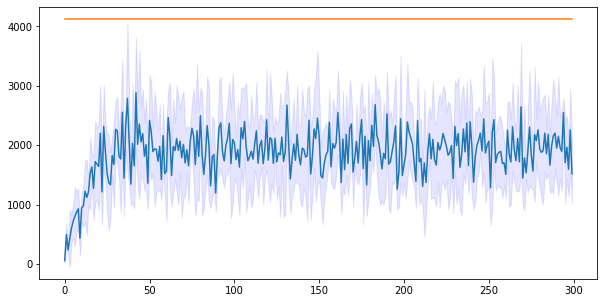

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
plt.plot(range(len(rewards)), [clairvoyant_reward] * len(rewards))
plt.show()

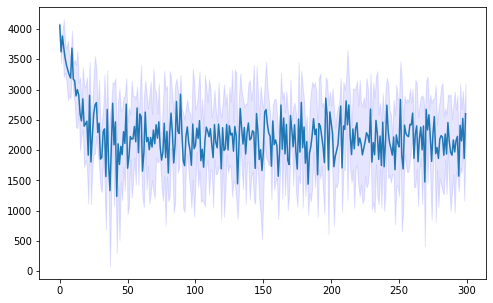

In [7]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)
std_regret = np.std(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)
plt.show()

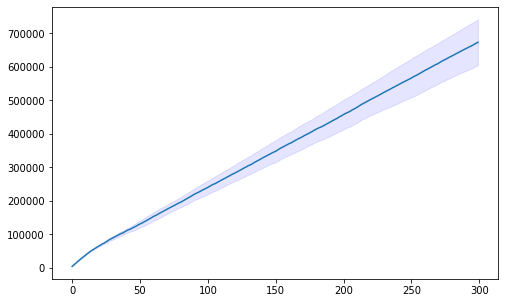

In [8]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)
cum_reg_std = np.std(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)
plt.show()